# Библиотеки

In [4]:
from zlib import crc32

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Код генерации выборки

In [2]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    size = rs.randint(low=5, high=10)
    data = rs.randn(30, size)
    for i in range(size):
        data[:, i] += rs.uniform()*2-1.0
    return data

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [5]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: egorov.sa@phystech.edu


{'mail': 'egorov.sa@phystech.edu',
 'id': 1581189463,
 'data': array([[-5.03173737e-01, -1.70177547e+00, -5.62814719e-02,
          1.59944732e+00, -6.18339557e-01, -1.81812407e-01,
          6.94521034e-01],
        [ 9.68349829e-01, -8.74327842e-01, -9.22017996e-01,
         -3.36217760e-01, -7.76650385e-01, -3.72310630e-01,
          6.21454811e-01],
        [ 8.60688130e-01, -3.37615342e-01,  6.06386046e-02,
          5.91460828e-01,  6.42576899e-01, -1.15725645e+00,
          1.86495744e+00],
        [-1.49770363e+00, -2.05180546e+00,  1.02084486e+00,
          2.90261952e+00, -1.05720519e-01,  9.03700144e-01,
          3.29244275e-01],
        [-1.71382735e+00, -2.28218218e+00, -7.95809957e-01,
          2.80217011e+00, -1.25691390e+00,  5.41864331e-01,
          4.73988401e-01],
        [-4.90231756e-01, -2.53054958e-01,  1.09313159e+00,
          4.21499328e-01, -6.33288331e-01, -3.12956193e-01,
          8.33561535e-01],
        [ 1.80007570e+00, -9.21461218e-01, -1.32404640e-

# Работа с выборкой

In [6]:
text_size = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = text_size
plt.rcParams['ytick.labelsize'] = text_size
plt.rcParams['legend.fontsize'] = text_size
plt.rcParams['axes.titlesize'] = text_size
plt.rcParams['axes.labelsize'] = text_size
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = text_size

In [15]:
data = pd.DataFrame(task['data'])
data.head(5)

,0,1,2,3,4,5,6
0,-0.503174,-1.701775,-0.056281,1.599447,-0.618340,-0.181812,0.694521
1,0.968350,-0.874328,-0.922018,-0.336218,-0.776650,-0.372311,0.621455
2,0.860688,-0.337615,0.060639,0.591461,0.642577,-1.157256,1.864957
3,-1.497704,-2.051805,1.020845,2.902620,-0.105721,0.903700,0.329244
4,-1.713827,-2.282182,-0.795810,2.802170,-1.256914,0.541864,0.473988


In [16]:
X = data.values
X = X.T

## T-критерий Стьюдента (без поправок)

In [17]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j])[1])


In [18]:
N = m*(m - 1)//2
print('Количество проведений теста Стьюдента: {}'.format(N))

Количество проведений теста Стьюдента: 21


In [19]:
f = lambda x: x> 0.05
accepted = len(list(filter(f, p_values)))
print('accepted {}'.format(accepted))
print('rejected {}'.format(len(p_values) - accepted))

accepted 6
rejected 15


In [20]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j], equal_var = False)[1])

f = lambda x: x> 0.05
accepted = len(list(filter(f, p_values)))
print('accepted {}'.format(accepted))
print('rejected {}'.format(len(p_values) - accepted))

accepted 6
rejected 15


In [21]:
noncor = sorted(p_values)

## T-критерий Стьюдента (c поправками)

### 1. Бонферрони

In [23]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j], equal_var = False)[1])

rejections = multipletests(p_values, method='bonferroni')[0]
f = lambda x: x == False
accepted = len(list(filter(f, rejections)))
print('accepted {}'.format(accepted))
print('rejected {}'.format(len(p_values) - accepted))

accepted 12
rejected 9


In [24]:
alpha = multipletests(p_values, method='bonferroni', alpha = 0.05)[3]
print('Значение уровня значимости при введении поправки Бонферрони: {}'.format(alpha))

Значение уровня значимости при введении поправки Бонферрони: 0.002380952380952381


In [25]:
bon = sorted(multipletests(p_values, method='bonferroni')[1])

### 2. Холма

In [26]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j], equal_var = False)[1])

rejections = multipletests(p_values, method='holm')[0]

f = lambda x: x == False
accepted = len(list(filter(f, rejections)))
print('accepted {}'.format(accepted))
print('rejected {}'.format(len(p_values) - accepted))

accepted 11
rejected 10


In [27]:
holm = sorted(multipletests(p_values, method='holm')[1])

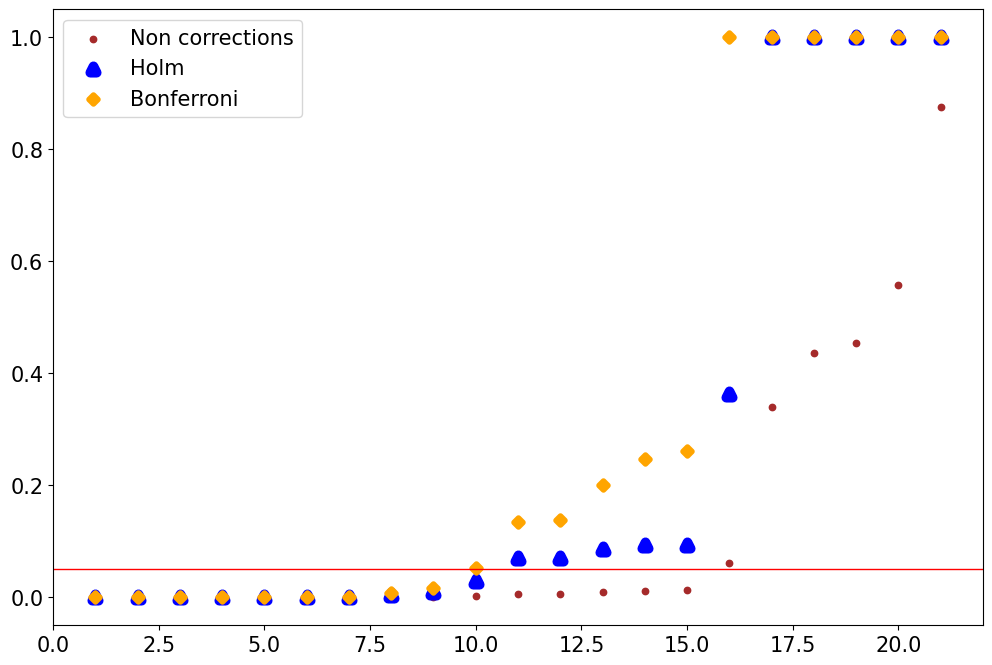

In [28]:
plt.scatter(range(1, N+1),noncor , s=N, color = 'brown', label = 'Non corrections')
plt.scatter(range(1, N+1), holm, s=N, color = 'blue', label = 'Holm',marker = "^", linewidths =7 )
plt.scatter(range(1, N+1), bon, s=N, color = 'orange', label = 'Bonferroni', marker = 'D', linewidths =4)
plt.axhline(y = 0.05, color = 'red', linewidth = 1)
plt.legend()
plt.show()

## Оценка количества верных гипотиз $m_0$ по методу Шведера-Спьётволла

In [29]:
m = X.shape[0]
p_values = []
for i in range(m):
    for j in range(m):
        if i < j:
            p_values.append(st.ttest_ind(X[i], X[j])[1])


l = 0.5
m0 = 1/(1 - l)*(1 + (np.array(p_values) > 0.5).sum())
m0

6.0